In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\GL62VR\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataframe = pd.read_csv('Hitters.csv', index_col=0).dropna()
train_data = dataframe.drop(['League', 'Division', 'NewLeague'], axis=1)
Y = train_data.Salary
X = train_data.drop(['Salary'], axis=1)

# Generate alphas

In [3]:
alphas = np.logspace(-2,6,100)

# 1.1 Lasso Regression

In [4]:
coefs = []
lasso = Lasso(alpha=None, fit_intercept=False, normalize=True, max_iter=10000)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X,Y)
    coefs.append(lasso.coef_)
    

## plot

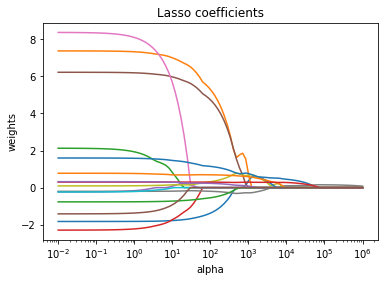

In [5]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients')
plt.axis('tight')
plt.show()

## cross validation

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
lasso_cv = LassoCV(alphas=None, normalize=True).fit(X_train, y_train)
lasso.set_params(alpha=lasso_cv.alpha_)
lasso.fit(X_train, y_train)
lasso_r2 = r2_score(y_test, lasso.predict(X_test))
print('Best lasso alpha: ', lasso_cv.alpha_)
print('Best lasso r2-score: ', lasso_r2)

Best lasso alpha:  3.252817256551886
Best lasso r2-score:  0.3716077529302878


In [7]:
pd.Series(lasso_cv.coef_, index=X.columns)

AtBat      0.000000
Hits       1.479823
HmRun      0.000000
Runs       0.476490
RBI        0.000000
Walks      1.448485
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.010559
CRBI       0.576495
CWalks     0.000000
PutOuts    0.156874
Assists   -0.000000
Errors     0.000000
dtype: float64

From the picture and lasso_cv.coef_ above, we can know the final three predictors are Hits, Walks and CRBI, because their weight are larger than others when alpha is optimized.
And there are 6 predictor left.

# 1.2 Ridge Regression

In [8]:
coefs_ridge = []
ridge = Ridge(alpha=None, normalize=True, max_iter=10000)
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, Y)
    coefs_ridge.append(ridge.coef_)


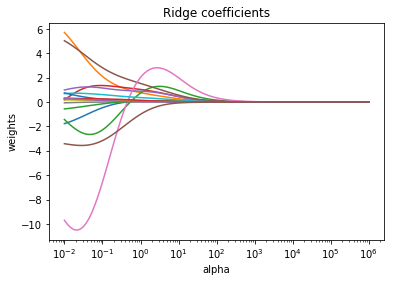

In [9]:
ax = plt.gca()

ax.plot(alphas, coefs_ridge)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients')
plt.axis('tight')
plt.show()

## cross validation 

In [10]:
ridge_cv = RidgeCV(alphas=alphas, normalize=True).fit(X_train, y_train)
ridge.set_params(alpha=ridge_cv.alpha_)
ridge.fit(X_train, y_train)
ridge_r2 = r2_score(y_test, ridge.predict(X_test))
print('Best ridge alpha: ', ridge_cv.alpha_)
print('Best ridge r2_score: ', ridge_r2)

Best ridge alpha:  0.01
Best ridge r2_score:  0.4087495612443742


In [11]:
pd.Series(ridge_cv.coef_, index=X.columns)

AtBat      -2.319875
Hits        5.668599
HmRun      -0.070451
Runs        2.686361
RBI         1.277258
Walks       4.411521
Years     -12.693309
CAtBat     -0.092490
CHits       0.265036
CHmRun     -0.153105
CRuns       0.645303
CRBI        0.799522
CWalks     -0.618125
PutOuts     0.334064
Assists     0.272878
Errors      0.402868
dtype: float64

From the picture and ridge_cv.coef_ above, we can know the final three predictors are Years, Hits and Walks.
And there are 15 predictor left.

# 2 Short Answer

Bias-variance tradeoff: Because the Total Generalization Error of our models is TGE = Bias + Variance + Irreducible Error. However, if the model have a low bias, its variance should be high. We must find the balance of them to make the sum lower. 

Regularization can prevent overfitting for models and help us reduce the variance, so it can improve the generalization of the model. Like it shows in Lasso regression, many predictors have 0 weights, which means the variance of the model is lowered and overfitting can be prevented, however this can increase the bias of the model and the r2-score of Lasso is lower than ridge.